### CLUSTERING

We will reuse the Breast_Cancer_Data.csv in previous exercise to cluster the patients

In [280]:
import pandas as pd

In [282]:
data=pd.read_csv("data\\Breast_Cancer_Data.csv")

### TASK 1
Since the previous exercise we have identified two top features to determine the diagnosis result, we will reuse these features for clustering. Purpose of using only these features is to help in visualizing the cluster later. Before that, keep the diagnosis result separately for further validation. 
The feature are:

* 'concave points_worst'
* 'perimeter_worst'

In [285]:
X = data[['concave points_worst', 'perimeter_worst']]
y = data['diagnosis']

### TASK 2
* Scale the data using MinMaxScaler()
* Save the scaled data in DataFrame for easier plotting.
* Plot Scatter of the data

In [288]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [290]:
scaled_data = pd.DataFrame(features_scaled, columns=['concave points_worst', 'perimeter_worst'])

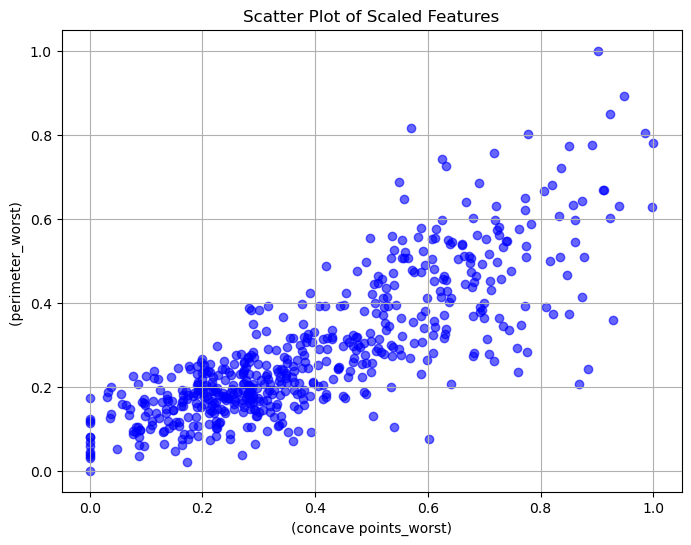

In [292]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data['concave points_worst'], scaled_data['perimeter_worst'], color='b', alpha=0.6)
plt.xlabel('(concave points_worst)')
plt.ylabel('(perimeter_worst) ')
plt.title('Scatter Plot of Scaled Features')
plt.grid(True)
plt.show()

### TASK 3
* From range of 1 to 5, iterate to train the KMeans Cluster using the scaled data 
* Plot the elbow graph based on trained KMeans
* Find most optimal cluster by examining the elbow graph

In [295]:
from sklearn.cluster import KMeans

inertia_values = []

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia_values.append(kmeans.inertia_)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

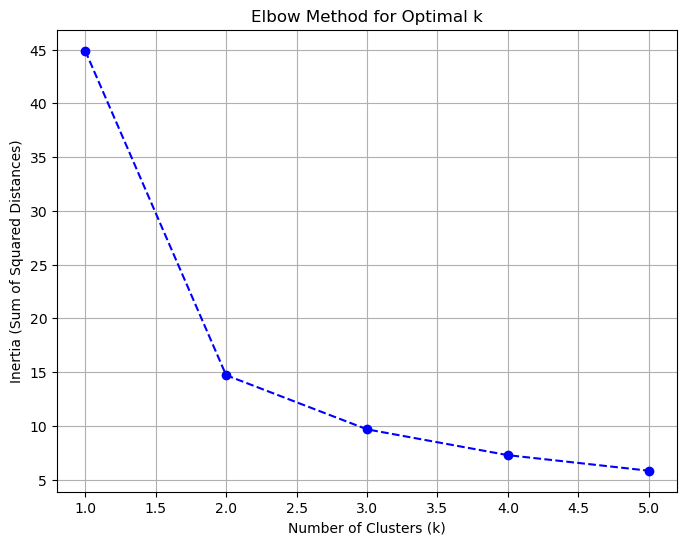

In [296]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), inertia_values, marker='o', color='b', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

### TASK 4
* Create a KMeans Cluster with the optimal cluster number
* Convert the scaled data to numpy train the KMeans with scaled data
* Predict cluster of the scaled data

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [302]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [304]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X_train_norm)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

In [305]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.5300197214301353

In [306]:
K = range(2, 7)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [307]:
fits

[KMeans(n_clusters=2, n_init=10, random_state=0),
 KMeans(n_clusters=3, n_init=10, random_state=0),
 KMeans(n_clusters=4, n_init=10, random_state=0),
 KMeans(n_clusters=5, n_init=10, random_state=0),
 KMeans(n_clusters=6, n_init=10, random_state=0)]

In [308]:
fits[0]

KMeans(n_clusters=2, n_init=10, random_state=0)

In [311]:
clusters_predicted = kmeans.predict(features_scaled_array)

data['predicted_cluster'] = clusters_predicted

print(data[['concave points_worst', 'perimeter_worst', 'predicted_cluster']].head())

   concave points_worst  perimeter_worst  predicted_cluster
0                0.2654           184.60                  1
1                0.1860           158.80                  1
2                0.2430           152.50                  1
3                0.2575            98.87                  1
4                0.1625           152.20                  1


### TASK 5
* Plot the predicted samples by their cluster together with the centroids
* Plot the actual sample based on diagnosis to compare. 
* Your previous cluster number might be larger than the actual classes (Malignant and Benign). Try to train KMeans with only two cluster and plot its prediction 

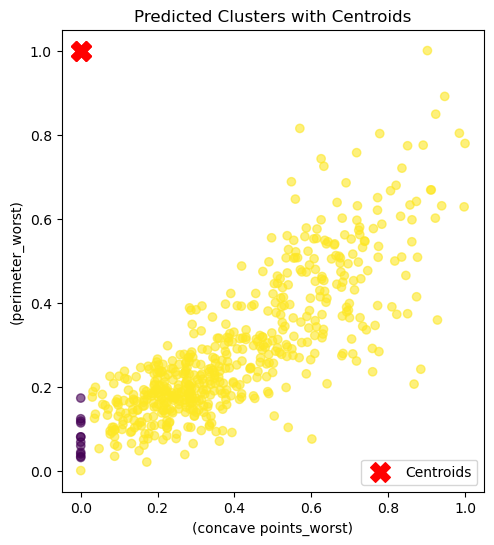

In [313]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(features_scaled_array[:, 0], features_scaled_array[:, 1], c=clusters_predicted, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('(concave points_worst)')
plt.ylabel('(perimeter_worst)')
plt.title('Predicted Clusters with Centroids')
plt.legend()

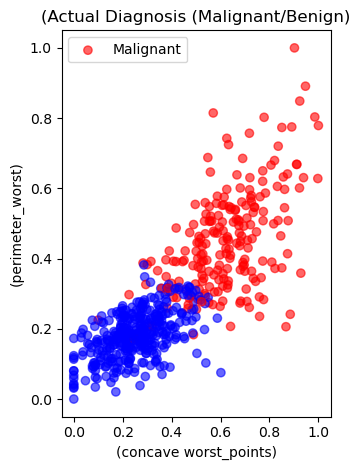

In [314]:
plt.subplot(1, 2, 2)
diagnosis_colors = {'M': 'red', 'B': 'blue'} 
plt.scatter(features_scaled_array[:, 0], features_scaled_array[:, 1], c=data['diagnosis'].map(diagnosis_colors), alpha=0.6)
plt.xlabel('(concave worst_points)')
plt.ylabel('(perimeter_worst)')
plt.title('(Actual Diagnosis (Malignant/Benign)')
plt.legend(['Malignant', 'Benign'])

plt.tight_layout()
plt.show()

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


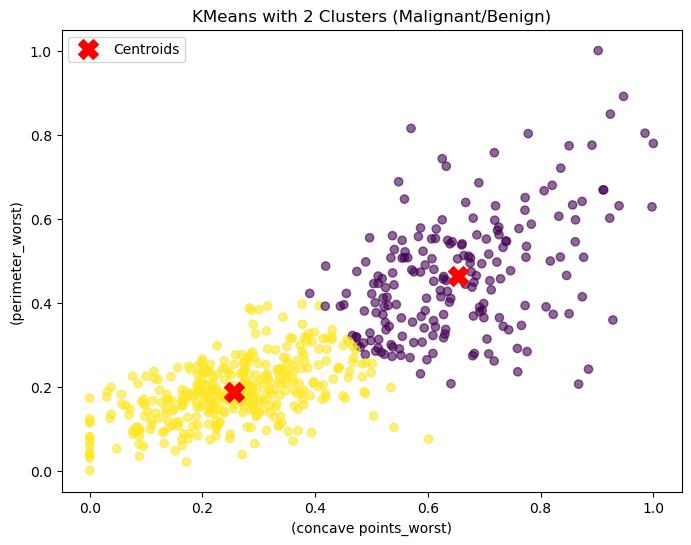

In [315]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_predicted_2 = kmeans_2.fit_predict(features_scaled_array)

centroids_2 = kmeans_2.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(features_scaled_array[:, 0], features_scaled_array[:, 1], c=clusters_predicted_2, cmap='viridis', alpha=0.6)
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('(concave points_worst)')
plt.ylabel('(perimeter_worst)')
plt.title('KMeans with 2 Clusters (Malignant/Benign)')
plt.legend()
plt.show()